In [2]:
#Tasks - Module 5 -- Time Series Analysis

#Loading necessary packages

import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import Series
import statsmodels as sm
import statsmodels.api as sm
from scipy import stats
from matplotlib.dates import DateFormatter
import scipy.stats as scp
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [2]:
#Task 1

#Reading in the necessary dataset
gold = pd.read_csv("gold.csv")

gold.columns = ["Price", "Time"]

gold.head()

,Price,Time
0,426.80,1
1,425.50,2
2,425.80,3
3,423.15,4
4,421.25,5


In [3]:
#Checking the type of data

gold.dtypes

Price    float64
Time       int64
dtype: object

In [4]:
#Setting the index of the dataframe to the Time column

gold.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R

gold.head()

,Price
Time,
1,426.80
2,425.50
3,425.80
4,423.15
5,421.25


[Text(0, 0.5, 'Gold price'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Price of Gold for the 252 trading days of 2005')]

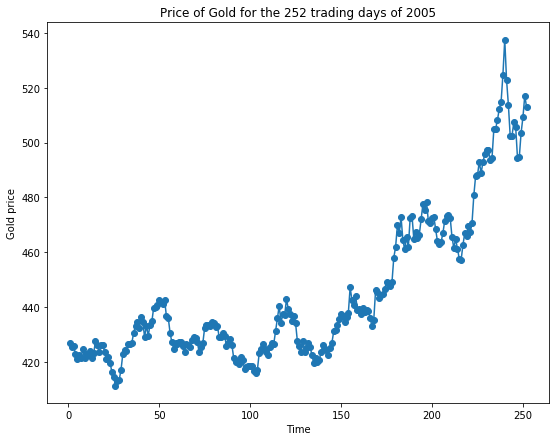

In [5]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(gold['Price'],'-o')
ax.set(xlabel="Time",ylabel="Gold price",title="Price of Gold for the 252 trading days of 2005")

# In the time series plot there is trend, no seasonality, no obvious intervention, and no changing 
# variance and succeeding observations imply the existence of autoregressive 
# behavior.

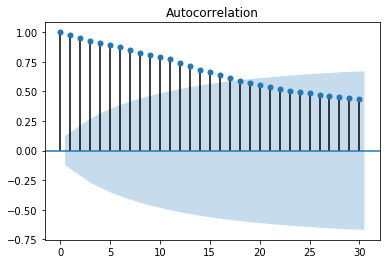

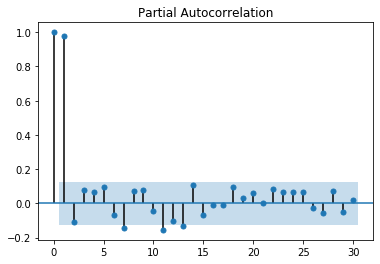

In [6]:
#Creating the ACF and PACF plots of the gold series

sm.graphics.tsa.plot_acf(gold.Price, lags=30);
sm.graphics.tsa.plot_pacf(gold.Price, lags=30);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [7]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(gold.Price)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# With a p-value of 0.986, we cannot reject the null hypothesis stating that
# the series is non-stationary.

(0.5607228356504287, 0.9866064223497039, 8, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, 1304.4835397204272)
ADF Statistic:           0.560723
p-value:                 0.986606


In [8]:
#Transforming the series

#gold_transformed, lambda_= stats.boxcox(gold.Price) #Automatically transforms the data with the best lambda value

#print("lambda=",lambda_)

#gold_transformed = pd.DataFrame(gold_transformed)

#Setting the index of the data frame
#gold_transformed.index=gold.index

#gold_transformed.columns = ['Transformed Price']

#gold_transformed

#As seen in Task 4 of Week 4, attempting a transformation with stats.boxcox function has some issues related to Scipy package implementation of the Boxcox transformation
#as a result, all the transformed values are equal and prevents proceeding with the transformed series
#A fix is being looked at for this part - will be updated if found

#Proceeding without transformation due to this issue - the R version of the solution has the transformation done

In [9]:
#Taking the first difference of the original series

differenced_gold = pd.DataFrame(Series.diff(gold['Price'], 1))

differenced_gold.columns = ['Differenced_gold']

differenced_gold.head()

,Differenced_gold
Time,
1,NaN
2,-1.30
3,0.30
4,-2.65
5,-1.90


[Text(0, 0.5, 'Differenced Gold price'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Differenced Price of Gold for the 252 trading days of 2005')]

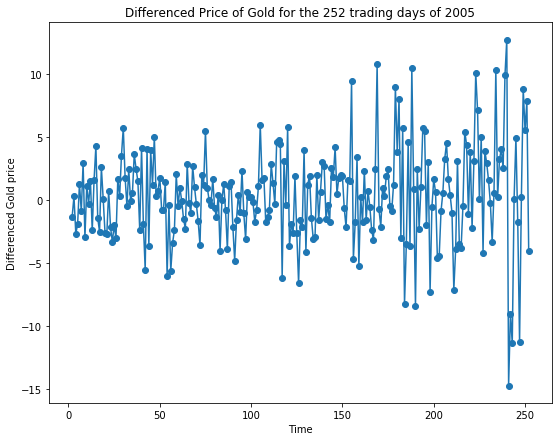

In [10]:
#Plotting the differenced time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_gold['Differenced_gold'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Gold price",title="Differenced Price of Gold for the 252 trading days of 2005")

# After applying the the first difference the series became detrended and stationary.
# Now there is some changing variance that has come to light.

In [11]:
#Removing the first NA value (since plotting with NA values gives an error with the ADF test)
differenced_gold_clean = differenced_gold.iloc[1:]

differenced_gold_clean.head()

,Differenced_gold
Time,
2,-1.30
3,0.30
4,-2.65
5,-1.90
6,1.30


In [12]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_gold_clean.Differenced_gold)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# With a p-value of 0.000, we can reject the null hypothesis stating that
# the series is non-stationary. Hence, the first differencing brings stationarity.

(-6.563039931805669, 8.289184340665105e-09, 7, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, 1297.6066544294586)
ADF Statistic:           -6.563040
p-value:                 0.000000


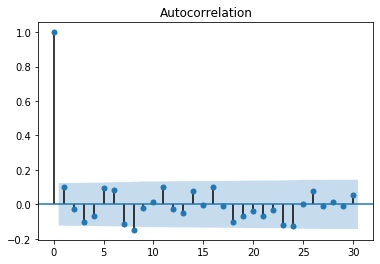

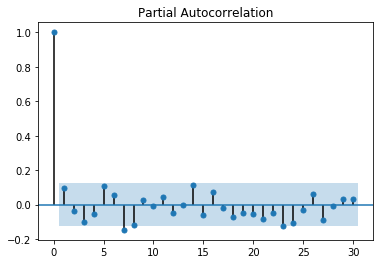

In [13]:
#Creating the ACF and PACF plots of the differenced gold series

sm.graphics.tsa.plot_acf(differenced_gold_clean.Differenced_gold, lags=30);
sm.graphics.tsa.plot_pacf(differenced_gold_clean.Differenced_gold, lags=30);

# Because there is not many significant lags seen in ACF and PACF it is not possible to 
# proceed over the ACF and PACF for this series. The patterns in ACF and PACF
# implies existence of white noise behaviour.

In [14]:
#There is no method to produce EACF plot in Python

In [15]:
#There is no method to produce the BIC plot in Python

In [16]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.
# In this particular case, ACF and PACF plots are not helpful to find the orders of the ARIMA models.

In [17]:
#Task 2

#Reading in the necessary dataset

JJ = pd.read_csv("JJ.csv", parse_dates=True, dayfirst=True)

JJ.head()

,JJ_earnings,Time
0,0.71,1960-01-01
1,0.63,1960-04-01
2,0.85,1960-07-01
3,0.44,1960-10-01
4,0.61,1961-01-01


In [18]:
#Converting Time column to Datetime64 type
JJ['Time']=pd.to_datetime(JJ['Time'], format='%Y-%m-%d')

JJ.dtypes

JJ_earnings           float64
Time           datetime64[ns]
dtype: object

In [19]:
#Setting the index of the dataframe to the Time column
JJ.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


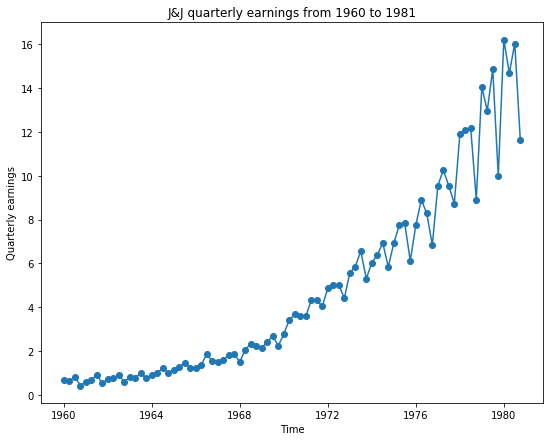

In [20]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(JJ.index.values, JJ['JJ_earnings'],'-o')
ax.set(xlabel="Time",ylabel="Quarterly earnings",title="J&J quarterly earnings from 1960 to 1981")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the time series plot there is trend, a repeating pattern (seasonality) and 
# changing (increasing varinace) and bouncing observations arond the mean level
# imply the existence of moving average behavior.

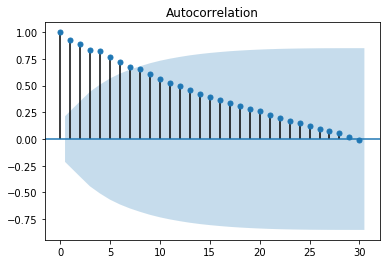

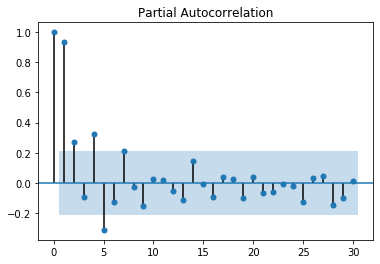

In [21]:
#Creating the ACF and PACF plots of the differenced gold series

sm.graphics.tsa.plot_acf(JJ.JJ_earnings, lags=30);
sm.graphics.tsa.plot_pacf(JJ.JJ_earnings, lags=30);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [22]:
#Transforming the series

JJ_transformed, lambda_= stats.boxcox(JJ.JJ_earnings) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

JJ_transformed = pd.DataFrame(JJ_transformed)

#Setting the index of the data frame
JJ_transformed.index=JJ.index

JJ_transformed.columns = ['Transformed_JJearnings']

JJ_transformed

lambda= 0.05071029569161342


,Transformed_JJearnings
Time,
1960-01-01,-0.339533
1960-04-01,-0.456665
1960-07-01,-0.161851
1960-10-01,-0.804126
1961-01-01,-0.488153
...,...
1979-10-01,2.441280
1980-01-01,2.991267
1980-04-01,2.877299


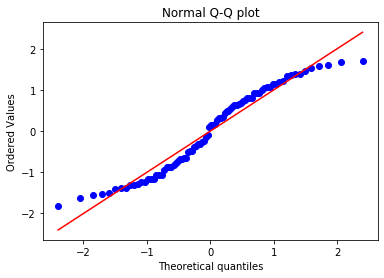

In [23]:
#Checking normality of Boxcox transformed JJ series using QQ plot

z = (JJ_transformed.Transformed_JJearnings-np.mean(JJ_transformed.Transformed_JJearnings))/np.std(JJ_transformed.Transformed_JJearnings)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# In the QQ plot the tails of the distribution is far from the normality.
# The p-value of Shapiro test is less than 0.05; hence, we have enough 
# evidence to reject the normality hypothesis. In conclusion, the Box-Cox
# transformation did not significantly help to improve normality of the observations.

In [24]:
#Shapiro-Wilk's test for normality

scp.shapiro(JJ_transformed.Transformed_JJearnings)

# In the QQ plot the tails of the distribution is far from the normality.
# The p-value of Shapiro test is less than 0.05; hence, we have enough 
# evidence to reject the normality hypothesis. In conclusion, the Box-Cox
# transformation did not significantly help to improve normality of the observations.

(0.9455819725990295, 0.001424900139681995)

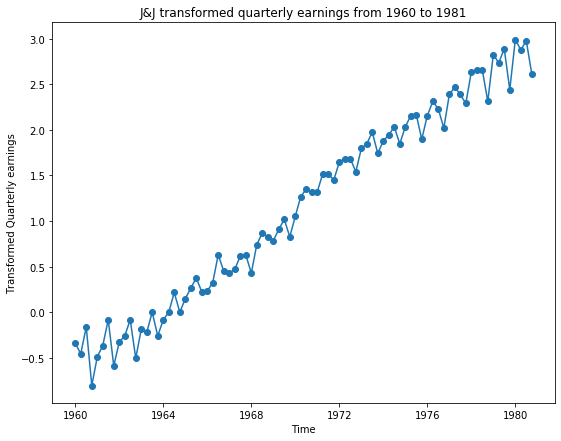

In [25]:
#Plotting the Boxcox transformed time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(JJ_transformed.index.values, JJ_transformed['Transformed_JJearnings'],'-o')
ax.set(xlabel="Time",ylabel="Transformed Quarterly earnings",title="J&J transformed quarterly earnings from 1960 to 1981")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the JJ time series plot, we observe that the variation in the series is 
# decreased after applying the Box-Cox transformation. But there is still trend.
# So let's apply the first difference and see if it helps.

In [26]:
#Taking the first difference of the transformed series

JJ_differenced = pd.DataFrame(Series.diff(JJ_transformed['Transformed_JJearnings'], 1))

JJ_differenced.columns = ['JJ_differenced']

JJ_differenced.head()

,JJ_differenced
Time,
1960-01-01,NaN
1960-04-01,-0.117131
1960-07-01,0.294814
1960-10-01,-0.642275
1961-01-01,0.315973


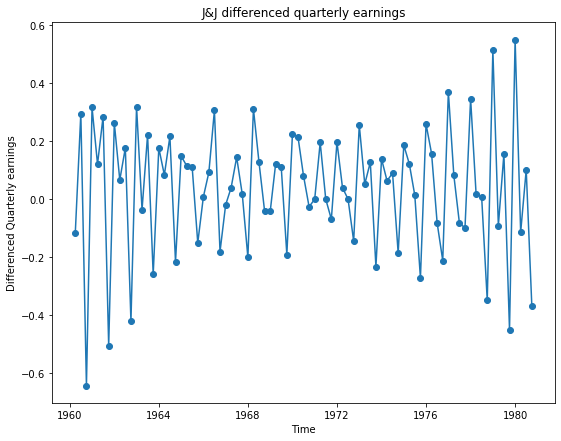

In [27]:
#Plotting the differenced JJ time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(JJ_differenced.index.values, JJ_differenced['JJ_differenced'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Quarterly earnings",title="J&J differenced quarterly earnings")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# Now, there is only changing variance in the series after taking the first difference.
# Let's go on with the specification of the models.

In [28]:
#Removing the first NA value
JJ_differenced_clean = JJ_differenced.iloc[1:]

JJ_differenced_clean.head()

,JJ_differenced
Time,
1960-04-01,-0.117131
1960-07-01,0.294814
1960-10-01,-0.642275
1961-01-01,0.315973
1961-04-01,0.120558


In [29]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(JJ_differenced_clean.JJ_differenced)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# The null hypothesis of non-stationarity is rejected with a p-value of 0.0003; hence,
# we conclude that the first differencing makes the series staionary.

(-4.381473537562146, 0.000320061976827438, 5, 77, {'1%': -3.518281134660583, '5%': -2.899878185191432, '10%': -2.5872229937594873}, -133.36434794532147)
ADF Statistic:           -4.381474
p-value:                 0.000320


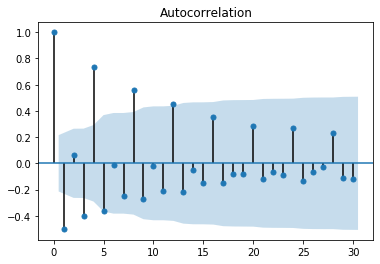

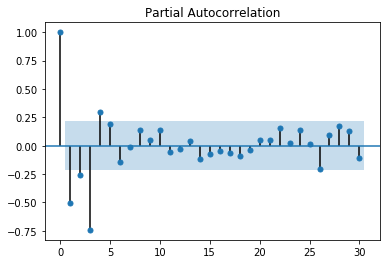

In [30]:
#Creating the ACF and PACF plots of the differenced JJ series

sm.graphics.tsa.plot_acf(JJ_differenced_clean.JJ_differenced, lags=30);
sm.graphics.tsa.plot_pacf(JJ_differenced_clean.JJ_differenced, lags=30);

# There is a slowly decaying jagged pattern in ACF and 4 significant lags in the PACF.
# So we can consider ARI(4,1) model and those smaller than this model like ARI(1,1)
# ARI(2,1) and so on.

In [31]:
#There is no method to produce EACF plot in Python

In [32]:
#There is no method to produce the BIC plot in Python

In [33]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

In [3]:
#Task 3

#Reading in the necessary dataset

unemployment = pd.read_csv("unemployment.csv", header=None, parse_dates=True, dayfirst=True)

unemployment.columns = ['Unemployed','Time']

unemployment.head()

,Unemployed,Time
0,1645.985983,1/01/1978
1,1660.177361,1/01/1979
2,1693.068156,1/01/1980
3,1721.856278,1/01/1981
4,1709.993418,1/01/1982


In [4]:
#Converting Time column to Datetime64 type
unemployment['Time']=pd.to_datetime(unemployment['Time'], format='%d/%m/%Y')

unemployment.dtypes

Unemployed           float64
Time          datetime64[ns]
dtype: object

In [5]:
#Setting the index of the dataframe to the Time column
unemployment.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


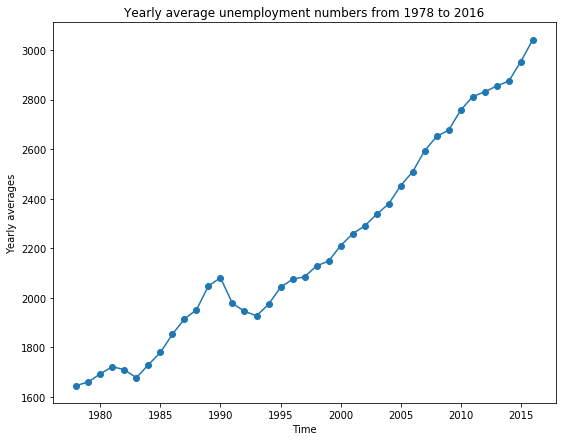

In [6]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(unemployment.index.values, unemployment['Unemployed'],'-o')
ax.set(xlabel="Time",ylabel="Yearly averages",title="Yearly average unemployment numbers from 1978 to 2016")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the time series plot there is trend, no seasonality and no changing 
# variance and succeeding observations imply the existence of autoregressive 
# behavior.

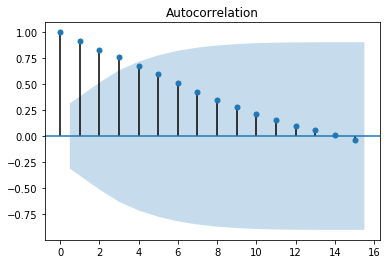

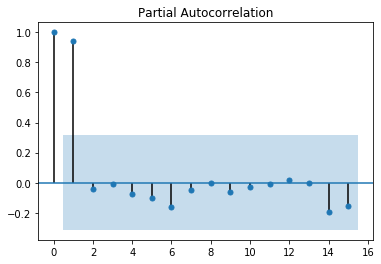

In [7]:
#Creating the ACF and PACF plots of the unemployment series

sm.graphics.tsa.plot_acf(unemployment.Unemployed, lags=15);
sm.graphics.tsa.plot_pacf(unemployment.Unemployed, lags=15);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [8]:
#Transforming the series

unemployment_transformed, lambda_= stats.boxcox(unemployment.Unemployed) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

unemployment_transformed = pd.DataFrame(unemployment_transformed)

#Setting the index of the data frame
unemployment_transformed.index=unemployment.index

unemployment_transformed.columns = ['unemployment_transformed']

unemployment_transformed.head()

# Here the lambda value is different from 1, so we go with the transformation (different from R)

lambda= -0.7173174684644411


,unemployment_transformed
Time,
1978-01-01,1.387211
1979-01-01,1.387253
1980-01-01,1.387348
1981-01-01,1.387429
1982-01-01,1.387396


In [9]:
#Taking the first difference of the original unemployment series

differenced_unemployment = pd.DataFrame(Series.diff(unemployment_transformed['unemployment_transformed'], 1))

differenced_unemployment.columns = ['differenced_unemployment']

differenced_unemployment.head()

,differenced_unemployment
Time,
1978-01-01,NaN
1979-01-01,0.000042
1980-01-01,0.000095
1981-01-01,0.000081
1982-01-01,-0.000033


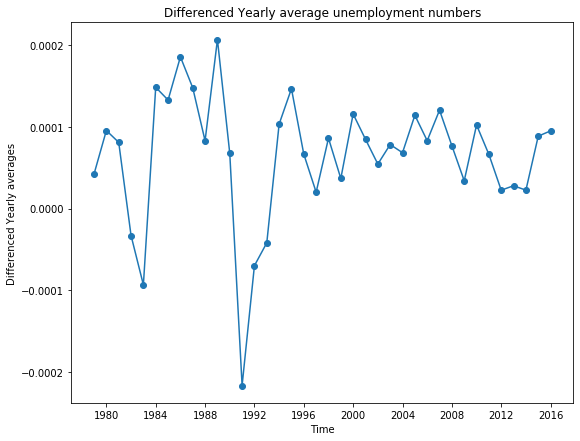

In [10]:
#Plotting the differenced time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_unemployment.index.values, differenced_unemployment['differenced_unemployment'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Yearly averages",title="Differenced Yearly average unemployment numbers")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in ther series

In [11]:
#Removing the first NA value
differenced_unemployment_clean = differenced_unemployment.iloc[1:]

differenced_unemployment_clean.head()

,differenced_unemployment
Time,
1979-01-01,0.000042
1980-01-01,0.000095
1981-01-01,0.000081
1982-01-01,-0.000033
1983-01-01,-0.000093


In [12]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_unemployment_clean.differenced_unemployment)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.27 that the series is still non-stationary at 1% level of significance.
# So we will apply the second differencing.

(-2.02060756676437, 0.27761113042135493, 7, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, -441.5769070234225)
ADF Statistic:           -2.020608
p-value:                 0.277611


In [13]:
#Taking the second order difference of the transformed unemployment series using the first differenced series

differenced2_unemployment = pd.DataFrame(Series.diff(differenced_unemployment_clean.differenced_unemployment, 1))

differenced2_unemployment.columns = ['differenced2_unemployment']

differenced2_unemployment.head()

,differenced2_unemployment
Time,
1979-01-01,NaN
1980-01-01,0.000053
1981-01-01,-0.000014
1982-01-01,-0.000114
1983-01-01,-0.000060


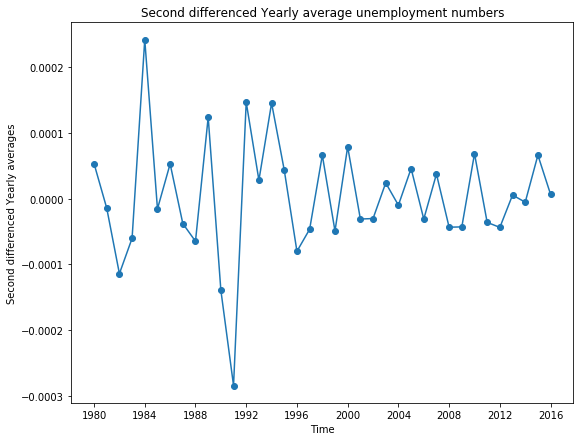

In [14]:
#Plotting the second differenced time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced2_unemployment.index.values, differenced2_unemployment['differenced2_unemployment'],'-o')
ax.set(xlabel="Time",ylabel="Second differenced Yearly averages",title="Second differenced Yearly average unemployment numbers")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is some trend in the series

In [15]:
#Removing the first two NA values
differenced2_unemployment_clean = differenced2_unemployment.iloc[2:]

differenced2_unemployment_clean.head()

,differenced2_unemployment
Time,
1981-01-01,-0.000014
1982-01-01,-0.000114
1983-01-01,-0.000060
1984-01-01,0.000242
1985-01-01,-0.000016


In [16]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced2_unemployment_clean.differenced2_unemployment)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.00 that the series becomes stationary at 5% level of significance with the 
# second differencing. 

(-4.813759497540987, 5.1183862425614e-05, 6, 29, {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}, -431.7878615826795)
ADF Statistic:           -4.813759
p-value:                 0.000051


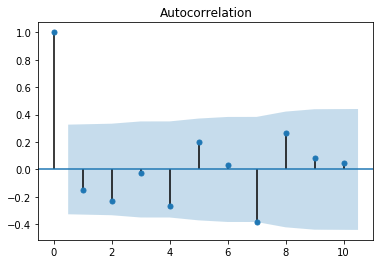

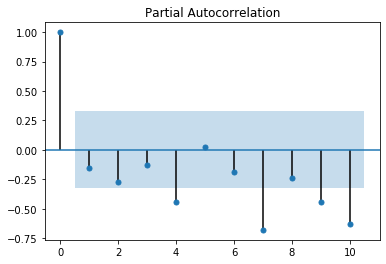

In [18]:
#Creating the ACF and PACF plots of the second differenced unemployment series

sm.graphics.tsa.plot_acf(differenced2_unemployment_clean, lags=10);
sm.graphics.tsa.plot_pacf(differenced2_unemployment_clean, lags=10);

# There is one significant lag in ACF and two significant lags in PACF.
# So we can include ARIMA(2,2,1) model among the candidate models.

In [49]:
#There is no method to produce EACF plot in Python

In [50]:
#There is no method to produce the BIC plot in Python

In [51]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.

In [52]:
#Task 4

#Reading in the necessary dataset

earnings = pd.read_csv("earnings.csv", header=None, parse_dates=True, dayfirst=True)

earnings.columns = ['Earnings','Time']

earnings.head()

,Earnings,Time
0,542.4,1/11/94
1,555.4,1/11/95
2,570.6,1/11/96
3,592.6,1/11/97
4,603.4,1/11/98


In [53]:
#Converting Time column to Datetime64 type
earnings['Time']=pd.to_datetime(earnings['Time'], format='%d/%m/%y')

earnings.dtypes

Earnings           float64
Time        datetime64[ns]
dtype: object

In [54]:
#Setting the index of the dataframe to the Time column
earnings.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

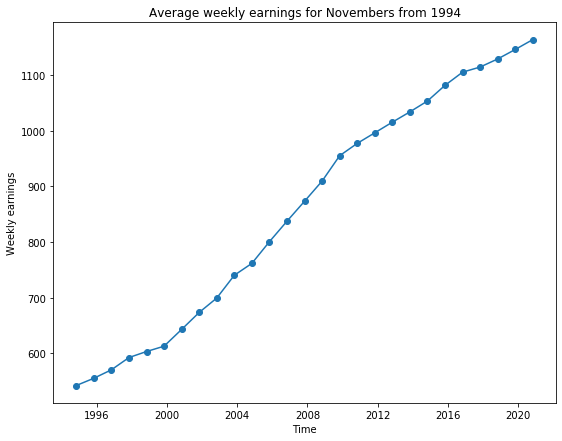

In [55]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(earnings.index.values, earnings['Earnings'],'-o')
ax.set(xlabel="Time",ylabel="Weekly earnings",title="Average weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# In the time series plot there is trend, no seasonality, no intervention, and no changing 
# variance and succeeding observations imply the existence of autoregressive 
# behavior.

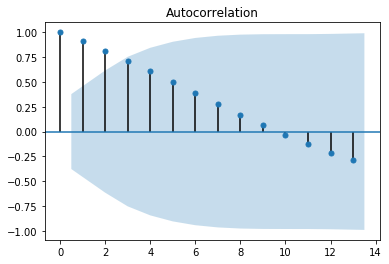

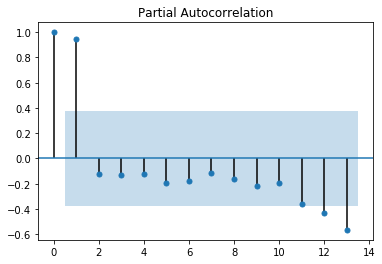

In [56]:
#Creating the ACF and PACF plots of the earnings series

sm.graphics.tsa.plot_acf(earnings.Earnings, lags=13);
sm.graphics.tsa.plot_pacf(earnings.Earnings, lags=13);

# Slowly decaying pattern in ACF and very high first correlation in PACF
# implies the existence of trend and nonstationarity.

In [57]:
#Transforming the series

earnings_transformed, lambda_= stats.boxcox(earnings.Earnings) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

earnings_transformed = pd.DataFrame(earnings_transformed)

#Setting the index of the data frame
earnings_transformed.index=earnings.index

earnings_transformed.columns = ['earnings_transformed']

earnings_transformed.head()

#The lambda value is different from the one seen in R

lambda= 0.8768858723423517


,earnings_transformed
Time,
1994-11-01,283.792912
1995-11-01,289.772544
1996-11-01,296.742322
1997-11-01,306.789913
1998-11-01,311.705478


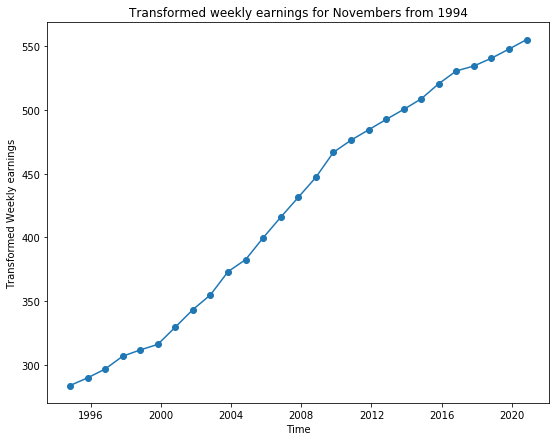

In [58]:
#Plotting the transformed earnings time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(earnings_transformed.index.values, earnings_transformed['earnings_transformed'],'-o')
ax.set(xlabel="Time",ylabel="Transformed Weekly earnings",title="Transformed weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# Because there was no changing variance, transformation had no effect on the series. 
# We will go with the original series.

In [59]:
#Taking the first difference of the original unemployment series

differenced_earnings = pd.DataFrame(Series.diff(earnings_transformed['earnings_transformed'], 1))

differenced_earnings.columns = ['differenced_earnings']

differenced_earnings.head()

,differenced_earnings
Time,
1994-11-01,NaN
1995-11-01,5.979632
1996-11-01,6.969778
1997-11-01,10.047591
1998-11-01,4.915565


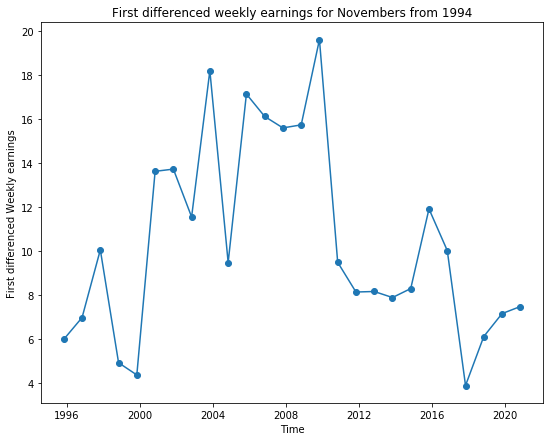

In [60]:
#Plotting the first differenced earnings time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_earnings.index.values, differenced_earnings['differenced_earnings'],'-o')
ax.set(xlabel="Time",ylabel="First differenced Weekly earnings",title="First differenced weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There is still some trend in the series

In [61]:
#Removing the first NA value
differenced_earnings_clean = differenced_earnings.iloc[1:]

differenced_earnings_clean.head()

,differenced_earnings
Time,
1995-11-01,5.979632
1996-11-01,6.969778
1997-11-01,10.047591
1998-11-01,4.915565
1999-11-01,4.360300


In [62]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced_earnings_clean.differenced_earnings)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.0502 that the series is still non-stationary at 5% level of significance.
# So we will apply the second differencing.

(-2.8599227581967885, 0.050210869194868106, 9, 16, {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}, 88.50075001343512)
ADF Statistic:           -2.859923
p-value:                 0.050211


In [63]:
#Taking the second difference of the original unemployment series

differenced2_earnings = pd.DataFrame(Series.diff(earnings_transformed['earnings_transformed'], 2))

differenced2_earnings.columns = ['differenced2_earnings']

differenced2_earnings.head()

,differenced2_earnings
Time,
1994-11-01,NaN
1995-11-01,NaN
1996-11-01,12.949410
1997-11-01,17.017369
1998-11-01,14.963156


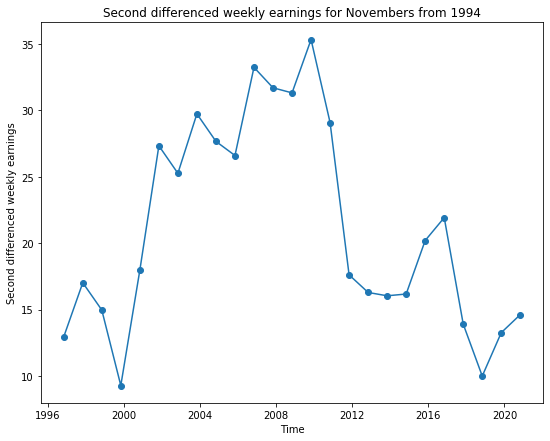

In [64]:
#Plotting the second differenced earnings time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced2_earnings.index.values, differenced2_earnings['differenced2_earnings'],'-o')
ax.set(xlabel="Time",ylabel="Second differenced weekly earnings",title="Second differenced weekly earnings for Novembers from 1994")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# There seems to be no trend in the series

In [65]:
#Removing the first two NA values
differenced2_earnings_clean = differenced2_earnings.iloc[2:]

differenced2_earnings_clean.head()

,differenced2_earnings
Time,
1996-11-01,12.949410
1997-11-01,17.017369
1998-11-01,14.963156
1999-11-01,9.275865
2000-11-01,17.977871


In [66]:
#Conducting the ADF unit root test to confirm stationarity

ADF_test = adfuller(differenced2_earnings_clean.differenced2_earnings)
print(ADF_test)
print('ADF Statistic:           %f' % (ADF_test[0]))
print('p-value:                 %f' % (ADF_test[1]))

# ADF test confirms with the p-value of 0.021 that the series is now stationary at 5% level of significance 
# with the second differcing. Note: This is different from the R result where second differencing is not enough to 
# bring stationarity to the series.

(-3.1808027086255115, 0.02112313409570123, 9, 15, {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}, 70.82025793726709)
ADF Statistic:           -3.180803
p-value:                 0.021123


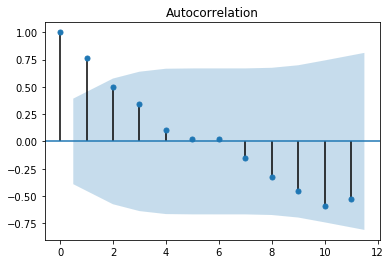

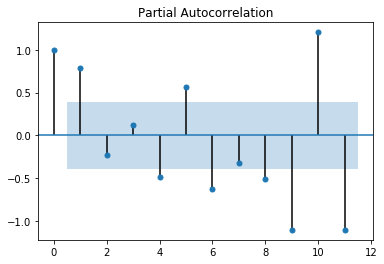

In [67]:
#Creating the ACF and PACF plots of the second differenced earnings series

sm.graphics.tsa.plot_acf(differenced2_earnings_clean.differenced2_earnings, lags=11);
sm.graphics.tsa.plot_pacf(differenced2_earnings_clean.differenced2_earnings, lags=11);

# There is one highly significant lag in ACF and one highly significant lag in PACF (among the first few lags).
# So we can include ARIMA(2,2,1) models among the candidate models.

# This result is slightly different to the one obtained in R.

In [68]:
#There is no method to produce EACF plot in Python

In [69]:
#There is no method to produce the BIC plot in Python

In [70]:
#As EACF and BIC plots cannot be created - the set of candidate models can be decided using only ACF and PACF.